### Import libraries

In [399]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import classification_report

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

### Import data and filter only on the needed features an labels

In [365]:
dataset = pd.read_csv('Consumer_Complaints.csv')
col = ['Product', 'Consumer Complaint']
dataset= dataset[col]

# Import data and drop rows with missing labels
dataset.dropna(subset=["Consumer Complaint"], inplace=True)
dataset.columns=['Product', 'ConsumerComplaint'] # Rename column
dataset['category_id'] = dataset['Product'].factorize()[0]

# print top 5 rows
dataset.head(5)
dataset=dataset[dataset['Product'].isin(['Credit reporting', 'Debt collection', 'Mortgage', 'Credit Card','Student loan','Bank account or service'])]
dataset.head(5)

,Product,ConsumerComplaint,category_id
1,Credit reporting,I have outdated information on my credit repor...,0
7,Credit reporting,An account on my credit report has a mistaken ...,0
12,Debt collection,This company refuses to provide me verificatio...,2
16,Debt collection,This complaint is in regards to Square Two Fin...,2
25,Mortgage,Started the refinance of home mortgage process...,3


### Plot the data

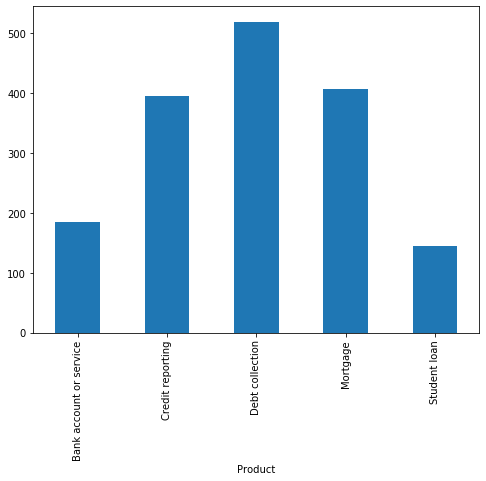

In [350]:
# Plot the data

import matplotlib.pyplot as plt
fig = plt.figure(figsize= (8,6))
dataset.groupby('Product').ConsumerComplaint.count().plot.bar(ylim=0)


### Split the data into training and test sets

In [370]:
# Split into X/y
x = dataset["ConsumerComplaint"]
y = dataset["category_id"]

#np.random.seed(42)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

### Convert text features to numeric

In [371]:
#cv = CountVectorizer()  # CountVectorizer is an alternative method (normally Tfid is better)
cv2 = TfidfVectorizer(sublinear_tf= True, min_df = 1, stop_words='english')

X_traincv = cv2.fit_transform(x_train)
print(X_traincv.toarray())

[[0.05568191 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.07626254 0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.04376272 0.         0.         ... 0.         0.         0.        ]]


In [372]:
# Build machine learning model

#model = RandomForestClassifier(random_state = 42)
#model = MultinomialNB()
model = LinearSVC()
model.fit(X_traincv, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [373]:
x_testcv = cv2.transform(x_test)
x_testcv.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.08287119, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.06511532, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [374]:
model.predict(x_testcv)

array([3, 0, 7, 2, 2, 0, 2, 0, 0, 0, 2, 2, 0, 3, 7, 6, 2, 6, 0, 6, 0, 0,
       3, 2, 3, 6, 3, 7, 6, 0, 2, 6, 2, 6, 7, 3, 2, 2, 3, 0, 2, 7, 0, 2,
       2, 3, 3, 0, 3, 0, 0, 2, 2, 2, 2, 3, 3, 3, 3, 2, 3, 0, 2, 0, 3, 2,
       2, 3, 3, 0, 0, 3, 2, 2, 2, 2, 3, 2, 2, 3, 2, 0, 3, 3, 2, 3, 2, 3,
       2, 6, 6, 6, 0, 7, 7, 3, 0, 2, 2, 2, 6, 3, 3, 0, 7, 3, 2, 2, 2, 3,
       6, 2, 2, 0, 7, 2, 2, 3, 0, 2, 3, 3, 7, 2, 2, 3, 2, 2, 3, 0, 2, 3,
       3, 2, 6, 2, 2, 0, 3, 0, 3, 2, 3, 7, 2, 2, 3, 2, 2, 2, 6, 2, 2, 3,
       3, 7, 2, 3, 0, 2, 6, 3, 6, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 3, 7,
       2, 0, 0, 0, 0, 0, 3, 3, 3, 0, 2, 3, 3, 2, 6, 2, 3, 2, 2, 0, 2, 2,
       3, 7, 0, 0, 3, 0, 0, 7, 3, 0, 6, 2, 3, 0, 0, 3, 0, 3, 3, 7, 0, 0,
       2, 0, 2, 3, 3, 3, 3, 0, 2, 2, 3, 3, 7, 0, 2, 0, 2, 3, 6, 3, 0, 3,
       0, 2, 6, 2, 2, 6, 6, 3, 0, 2, 0, 2, 2, 2, 3, 0, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 0, 2, 2, 0, 2, 2, 0, 3, 2, 3, 0, 7, 2, 3, 0, 3, 2, 0, 2,
       7, 0, 3, 0, 2, 6, 2, 2, 2, 3, 3, 6, 3, 2, 3,

In [375]:
model.score(x_testcv, y_test)

0.879154078549849

In [394]:
results = model.predict(cv2.transform(["I would like to pay my outstanding balance please",
                             "Please send me my latest home loan statement",
                             "My account balance is incorrect"]))
print(pd.DataFrame(results))

   0
0  2
1  3
2  0


In [386]:
dataset.head(20)

,Product,ConsumerComplaint,category_id
1,Credit reporting,I have outdated information on my credit repor...,0
7,Credit reporting,An account on my credit report has a mistaken ...,0
12,Debt collection,This company refuses to provide me verificatio...,2
16,Debt collection,This complaint is in regards to Square Two Fin...,2
25,Mortgage,Started the refinance of home mortgage process...,3
26,Mortgage,"In XXXX, I and my ex-husband applied for a ref...",3
28,Credit reporting,I have disputed several accounts on my credit ...,0
29,Mortgage,Mortgage was transferred to Nationstar as of X...,3
49,Debt collection,I am writing to request your assistance in loo...,2
61,Credit reporting,I am disputing the inaccurate information the ...,0


### Evaluation metrics

In [387]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels
    on a classification.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds, average='micro')
    recall = recall_score(y_true, y_preds, average='micro')
    f1 = f1_score(y_true, y_preds, average='micro')
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2),
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")
    
    return metric_dict

In [389]:
predicted = model.predict(x_testcv)
evaluate_preds(y_test, predicted)

Acc: 87.92%
Precision: 0.88
Recall: 0.88
F1 score: 0.88


{'accuracy': 0.88, 'precision': 0.88, 'recall': 0.88, 'f1': 0.88}

* ***Accuracy*** is a good measure to start with if all classes are balanced (e.g. same amount of samples which are labelled with 0 or 1).
* ***Precision*** and ***recall*** become more important when classes are imbalanced.
If false positive predictions are worse than false negatives, aim for higher precision.
If false negative predictions are worse than false positives, aim for higher recall.
* ***F1-score*** is a combination of precision and recall.

In [397]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86        81
           2       0.88      0.92      0.90       110
           3       0.86      0.96      0.91        80
           6       0.92      0.83      0.87        29
           7       0.91      0.68      0.78        31

    accuracy                           0.88       331
   macro avg       0.89      0.85      0.86       331
weighted avg       0.88      0.88      0.88       331



In [364]:
# Visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test,
            predicted,
            rownames=["Actual Labels"],
            colnames=["Predicted Labels"])

Predicted Labels,0,2,3,6,7
Actual Labels,,,,,
0,68,7,5,1,0
2,5,101,1,1,2
3,1,2,77,0,0
6,1,2,2,24,0
7,2,3,5,0,21


### Hypertuning with GridSearchCV - Example

In [ ]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

# Create a based model
model = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, 
                          cv = 3, n_jobs = 1, verbose = 2)
grid_search.fit(X_traincv, y_train)
grid_search.best_params_